Credits:

https://www.youtube.com/watch?v=V-IRkO4NIHU

https://gitlab.com/stragu/DSH/blob/master/R/heatmaps/heatmaps_intermediate.md

## 1. base function: heatmap()

In [1]:
?mtcars

In [2]:
dim(mtcars)
str(mtcars)
head(mtcars)

[1] 32 11

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
heatmap(mtcars)
#?heatmap

ERROR: Error in heatmap(mtcars): 'x' must be a numeric matrix


In [4]:
class(mtcars)

[1] "data.frame"

convert a DF to a numeric matrix

In [5]:
mtcars_matrix <- data.matrix(mtcars) 
class(mtcars_matrix)

[1] "matrix"

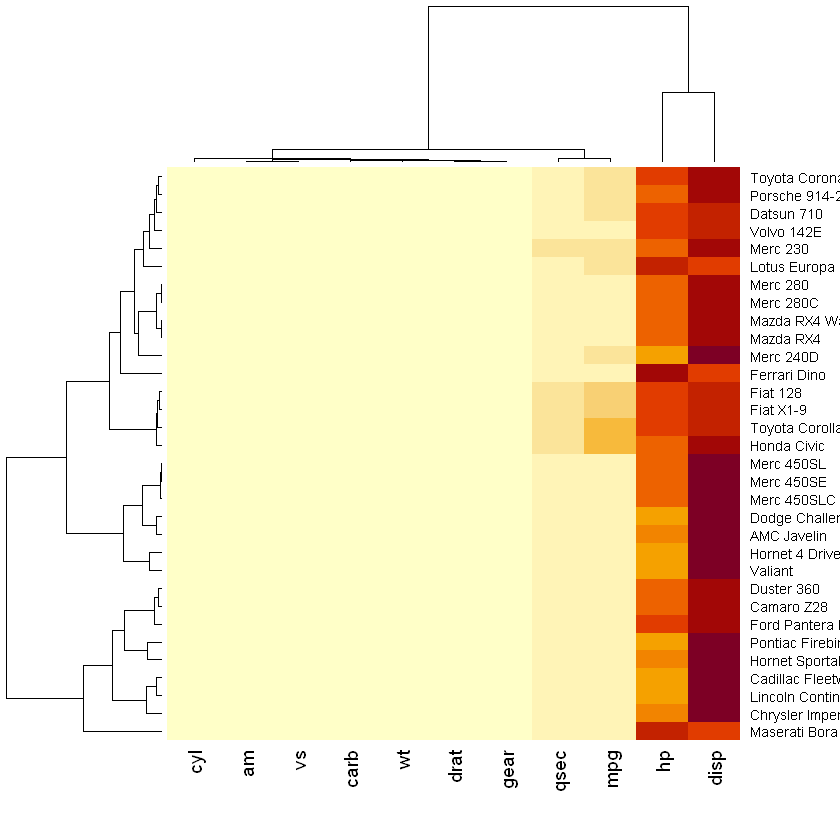

In [22]:
heatmap(mtcars_matrix)

Here the data is colum wise, so we have to scale it accordingly

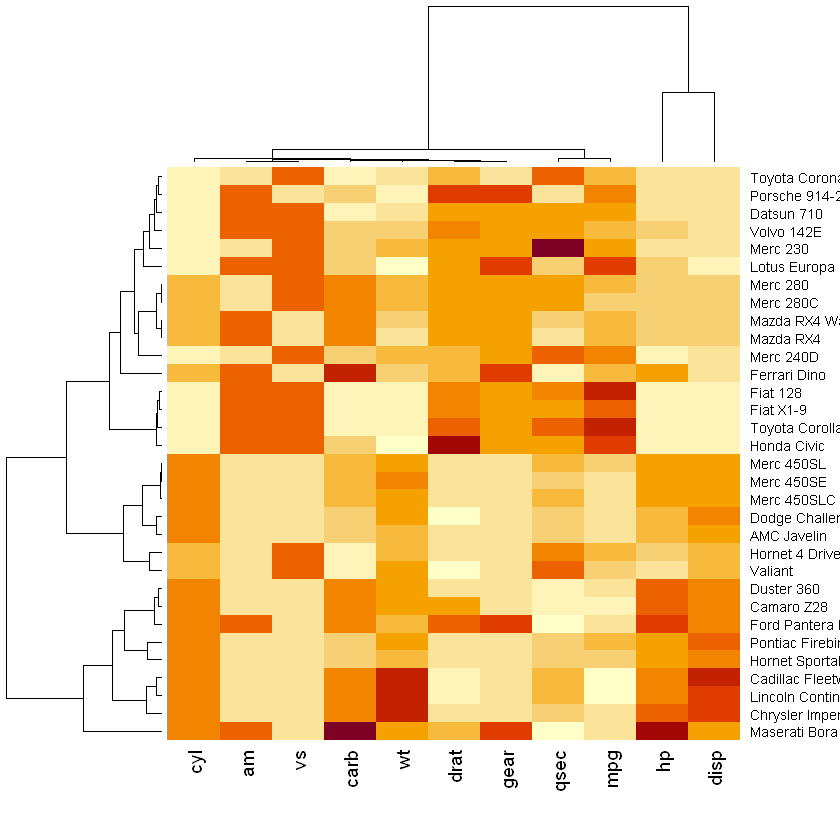

In [7]:
heatmap(mtcars_matrix,
        scale="column")

#light yellow for low values
#dark red for high values
#dendograms tell how comparable the variables are

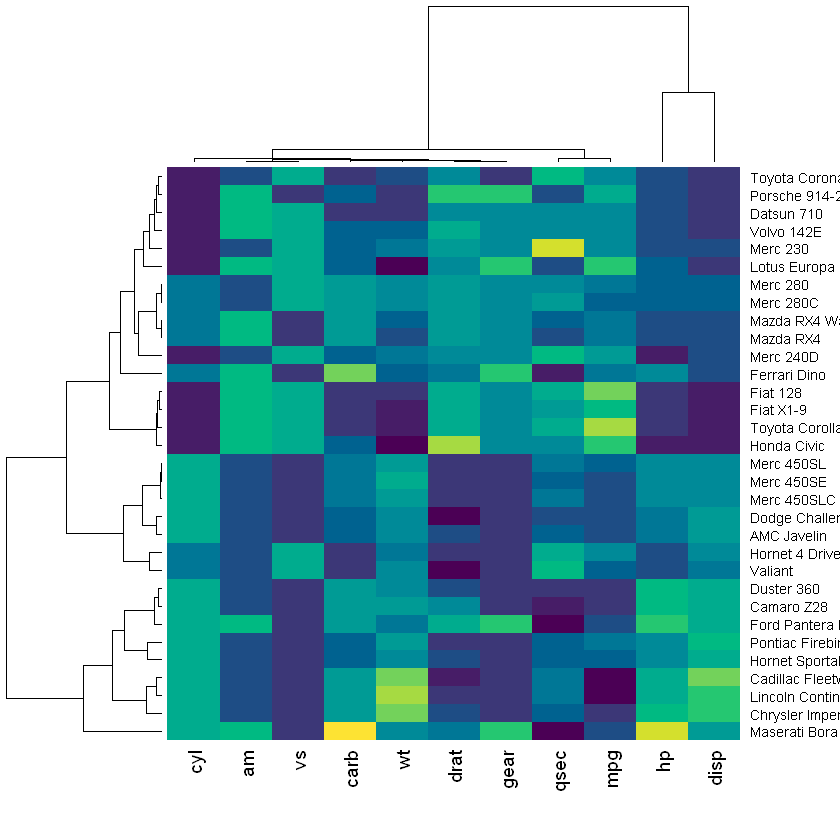

In [8]:
heatmap(mtcars_matrix,
        scale="column",
        col=hcl.colors(n=15, palette = "viridis", alpha = NULL, rev = FALSE, fixup = TRUE))

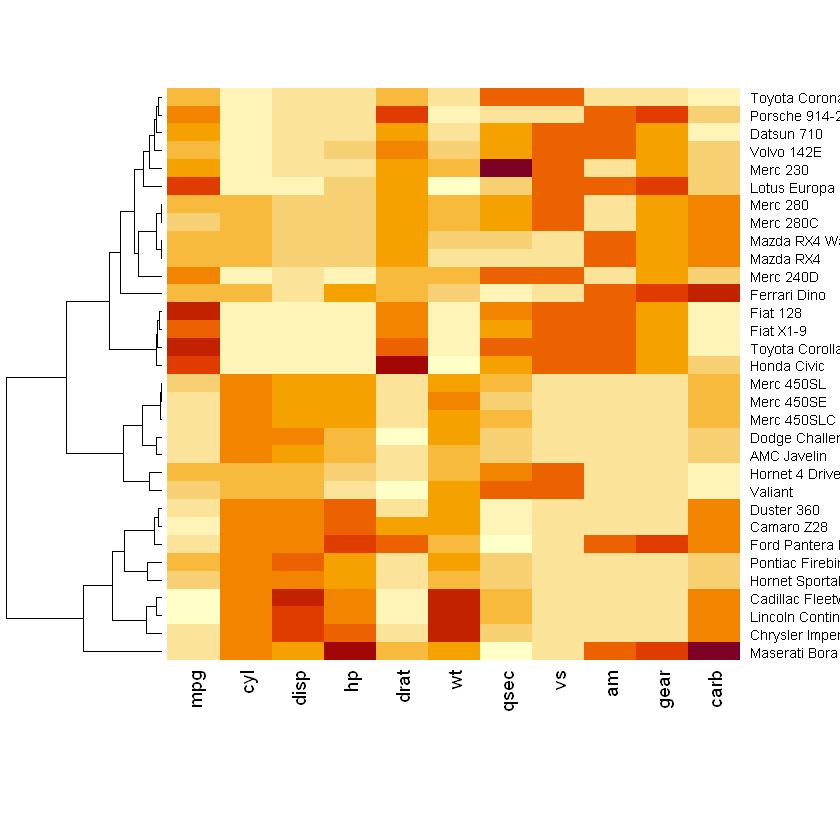

In [9]:
#remove dendogram
heatmap(mtcars_matrix,
        scale="column",
        Colv=NA)

We can see that the below half were Mercedes, Form , Camaro .. are bettrr no. of cylinders, displacement,weight .... and the upper half is better in mileage(mpg),draft..

we can check dataset and heatmap to find that the cars on upper half are almost manual(am=1) and they have better mileage than automatic (am=0) cars

## 2. gplots::heatmap.2()

In [10]:
#install.packages("gplots")
library(gplots)
#?heatmap.2

Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [12]:
#import protrien data from web
rawdata <- read.csv("https://raw.githubusercontent.com/ab604/heatmap/master/leanne_testdata.csv")

In [13]:
str(rawdata)
head(rawdata)

'data.frame':	63 obs. of  8 variables:
 $ Row_ID      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X1.Control  : num  7.15 6.64 3.68 5.04 6.92 ...
 $ X2.Control  : num  7.16 6.61 3.78 5.01 6.81 ...
 $ X3.Control  : num  7.11 6.59 3.81 4.69 6.9 ...
 $ X1.Treatment: num  6.91 6.37 2.4 3.43 7.12 ...
 $ X2.Treatment: num  6.88 6.35 2.09 3.52 7.21 ...
 $ X3.Treatment: num  6.92 6.41 2.17 3.66 7.27 ...
 $ T.test      : num  0.000413 0.000742 0.00101 0.001262 0.004306 ...


,Row_ID,X1.Control,X2.Control,X3.Control,X1.Treatment,X2.Treatment,X3.Treatment,T.test
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,7.152522,7.163227,7.112041,6.912676,6.882109,6.918670,0.000412886
2,2,6.639397,6.614227,6.594811,6.365425,6.349997,6.411068,0.000741591
3,3,3.678131,3.776133,3.813182,2.398460,2.088798,2.172404,0.001009950
4,4,5.040845,5.007151,4.686440,3.425154,3.516301,3.657402,0.001262187
5,5,6.915152,6.810610,6.897310,7.124722,7.211372,7.269469,0.004306239
6,6,4.570305,4.658906,4.819562,5.295718,5.119475,5.134975,0.006656693


In [14]:
#cleanup data
rawdata <- rawdata[ , 2:7] # remove superfluous columns
colnames(rawdata) <- c(paste("Control", 1:3, sep = "_"),
                       paste("Treatment", 1:3, sep = "_"))

In [15]:
colnames(rawdata)

[1] "Control_1"   "Control_2"   "Control_3"   "Treatment_1" "Treatment_2"
[6] "Treatment_3"

In [23]:
head(rawdata)

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.152522,7.163227,7.112041,6.912676,6.882109,6.918670
2,6.639397,6.614227,6.594811,6.365425,6.349997,6.411068
3,3.678131,3.776133,3.813182,2.398460,2.088798,2.172404
4,5.040845,5.007151,4.686440,3.425154,3.516301,3.657402
5,6.915152,6.810610,6.897310,7.124722,7.211372,7.269469
6,4.570305,4.658906,4.819562,5.295718,5.119475,5.134975


In [16]:
class(rawdata)

[1] "data.frame"

In [17]:
data_matrix <- data.matrix(rawdata)
class(data_matrix)

[1] "matrix"

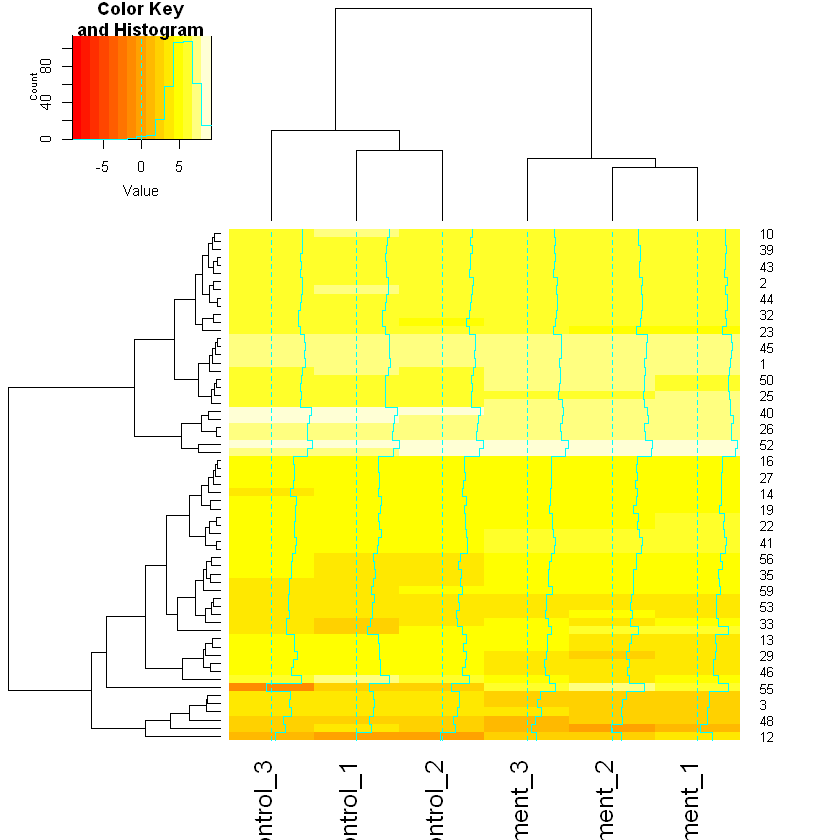

In [18]:
heatmap.2(data_matrix)

Here lighter colors are for high values

#scaling in row to see how protien reacted for paticular treatment

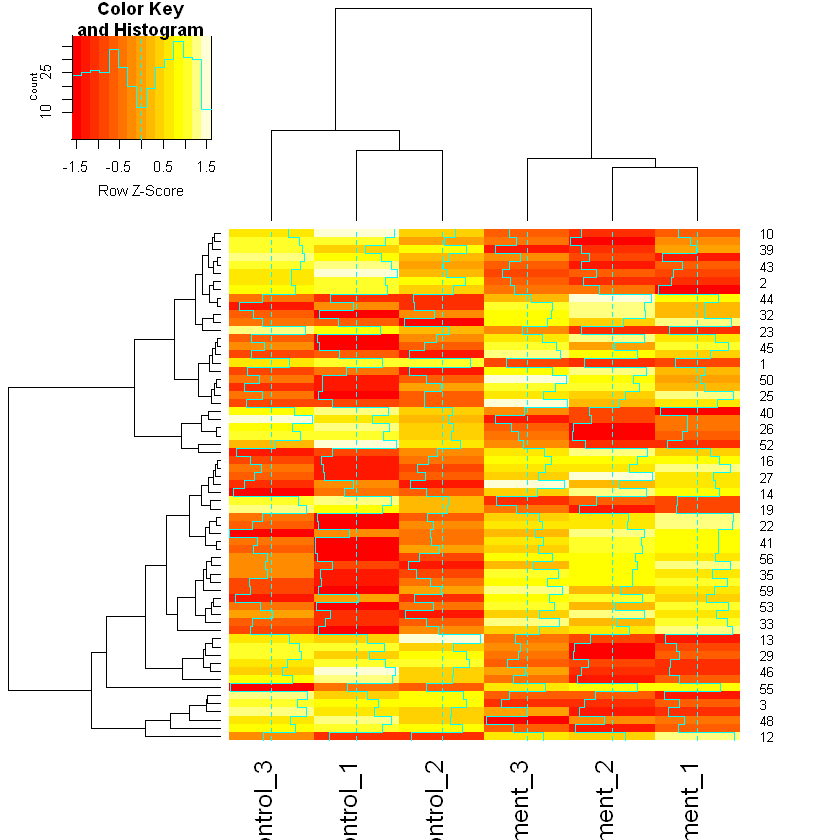

In [19]:
heatmap.2(data_matrix,
scale = "row")

#scale before visualizing
#?scale
#?t
#transpose and scale, bcoz scale() will not allow to scale on row

In [27]:
data_scaled_t <- scale(t(data_matrix))
data_scaled <- t(data_scaled_t)

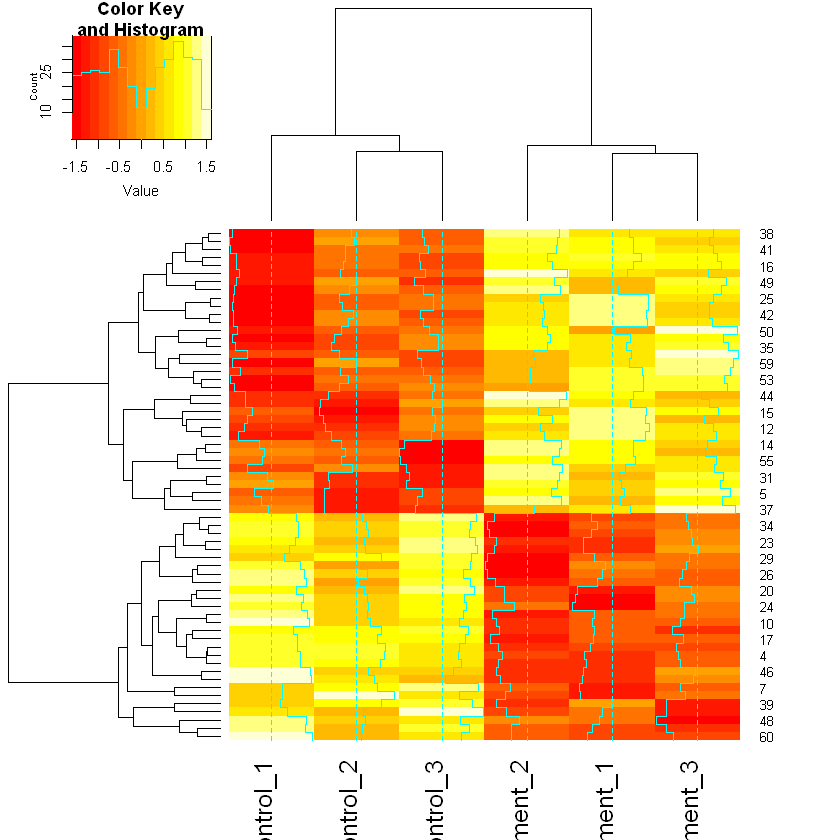

In [28]:
heatmap.2(data_scaled)

In [29]:
my_palette <- colorRampPalette(c("blue",
"white",
"red")) # from low to high

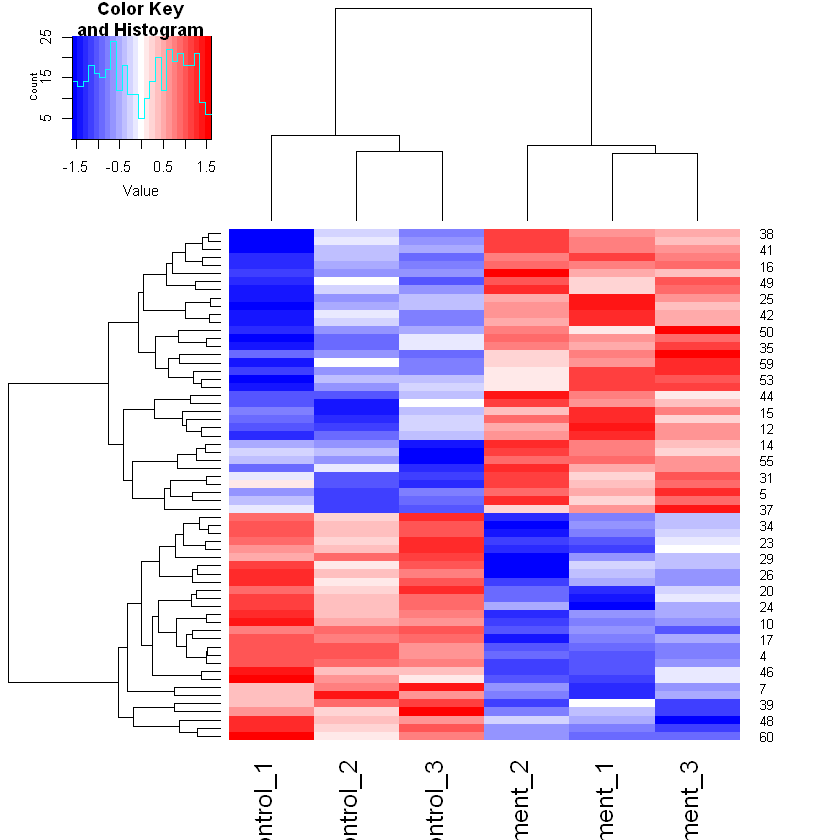

In [30]:
heatmap.2(data_scaled,
trace = "none", # turn off trace lines from heatmap
col = my_palette(25)) # use my colour scheme with 25 levels

Warning message in heatmap.2(data_scaled, Colv = NA, trace = "none", col = my_palette(25), :
"Discrepancy: Colv is FALSE, while dendrogram is `both'. Omitting column dendogram."

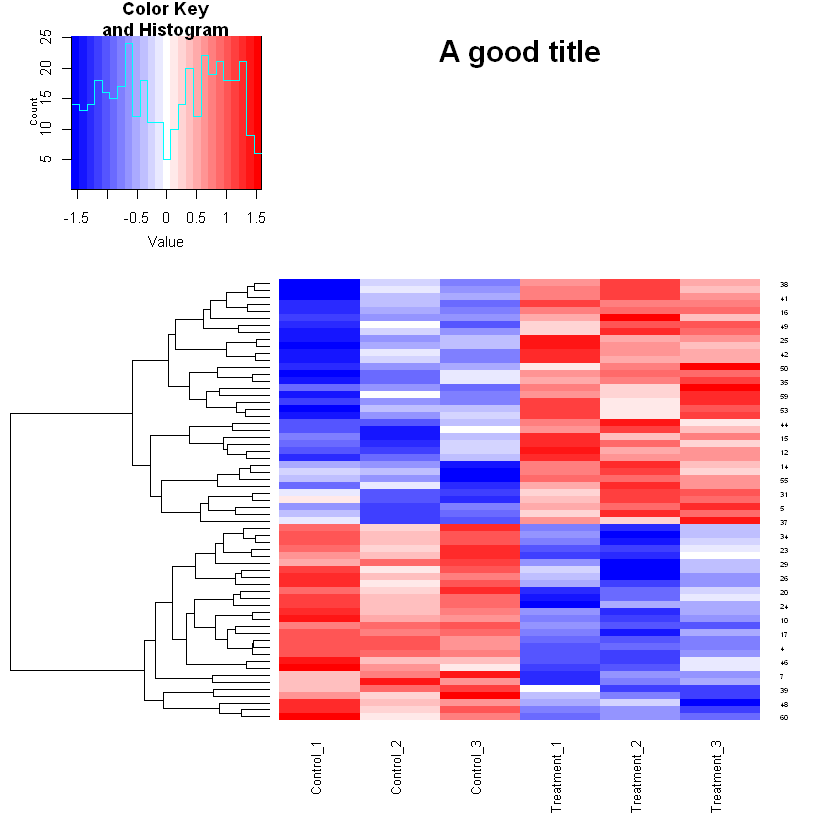

In [38]:
heatmap.2(data_scaled,
Colv = NA, # no clustering on columns
trace = "none",
col = my_palette(25),
main = "A good title", # add title
margins = c(6, 4), # more space from border
keysize = 2, # make key and histogram bigger
cexRow = 0.40, # amend row font
cexCol = 0.80) # amend column font


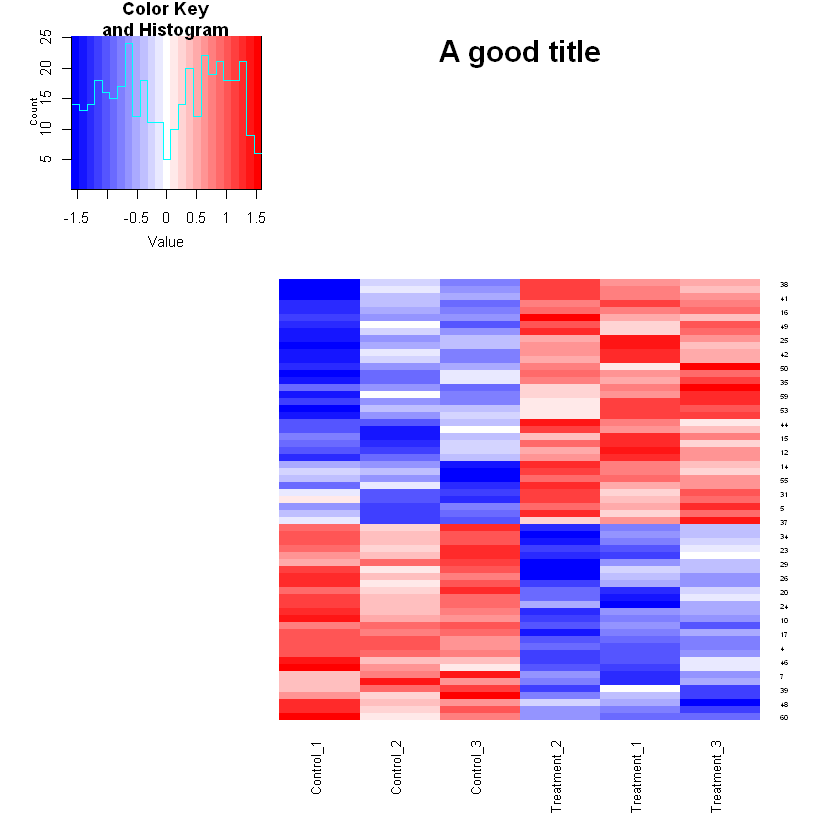

In [41]:
heatmap.2(data_scaled,
dendrogram = "none", # remove the row dendrogram
trace = "none",
col = my_palette(25),
main = "A good title",
margins = c(6, 4),
keysize = 2,
cexRow = 0.40,
cexCol = 0.80)


## 3. pheatmap::pheatmap()

In [44]:
#install.packages("pheatmap")
library(pheatmap)
#?pheatmap

Warning message:
"package 'pheatmap' was built under R version 3.6.3"

Uing random data

In [45]:
d <- matrix(rnorm(25), 5, 5)
colnames(d) <- paste0("Treatment", 1:5)
rownames(d) <- paste0("Gene", 1:5)

In [49]:
d

,Treatment1,Treatment2,Treatment3,Treatment4,Treatment5
Gene1,0.1688852,-0.01360825,0.2910041,0.5728530,0.7155244
Gene2,-0.6124234,0.08056743,1.6285956,0.1929505,1.8229894
Gene3,0.1464837,-3.85331299,-0.1316903,-0.8271210,-0.4060597
Gene4,0.4392203,0.34442016,-1.4351235,-0.5813092,1.3657101
Gene5,0.9782281,-1.91326285,0.6065885,-0.2082522,2.1076265


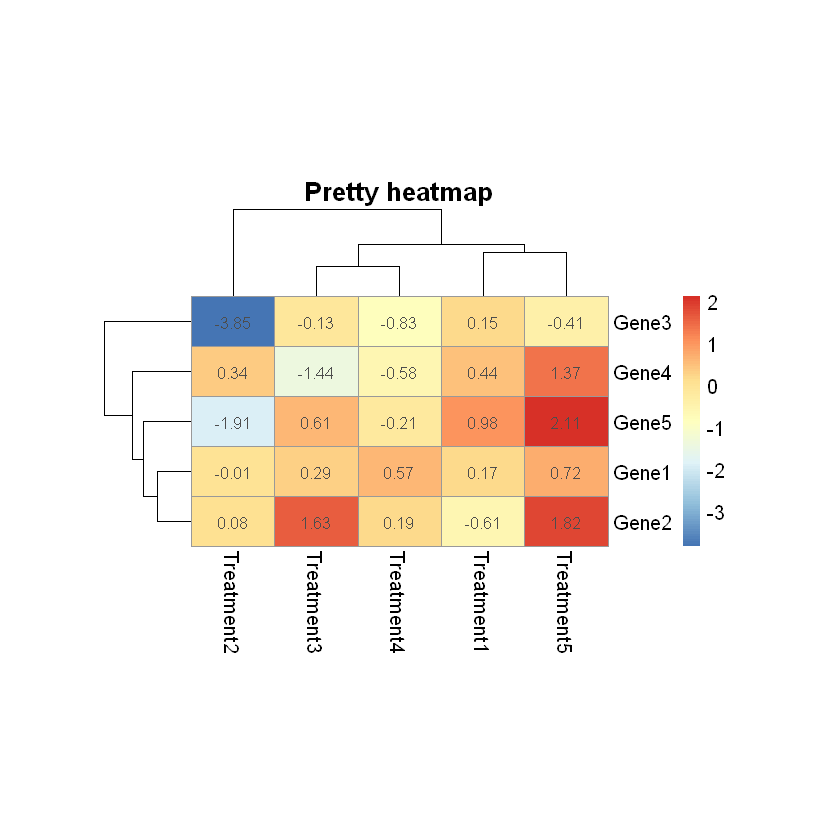

In [46]:
pheatmap(d,
main = "Pretty heatmap",
cellwidth = 50,
cellheight = 30,
fontsize = 12,
display_numbers = TRUE)

By default, the scale argument is set to "none". If you do scale
the data, the clustering will take it into account (i.e. the
clustering happens after the scaling).

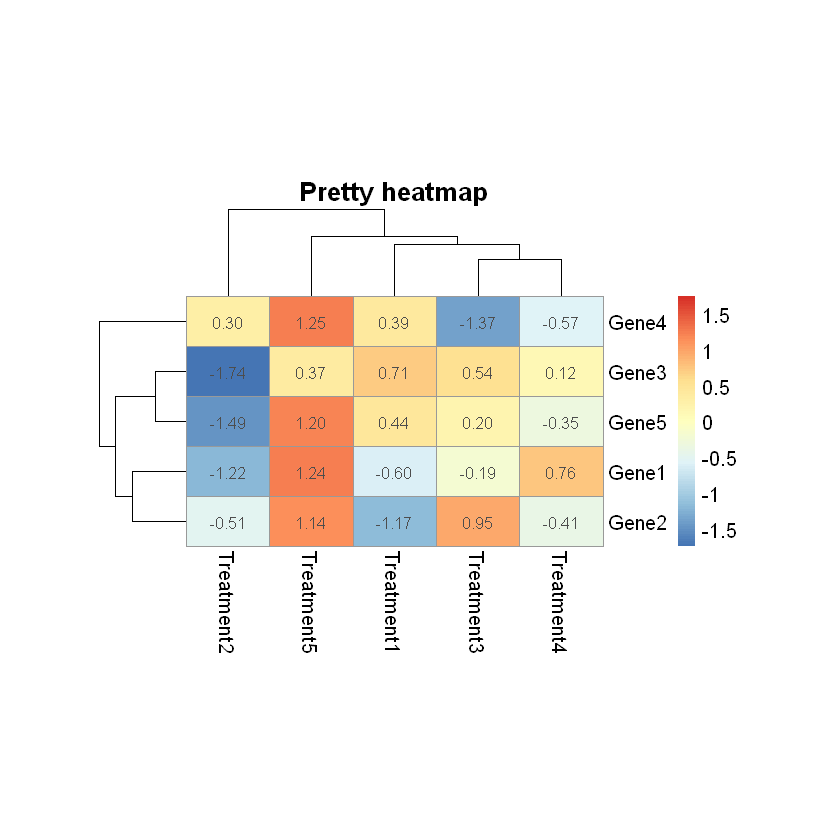

In [47]:
pheatmap(d,
main = "Pretty heatmap",
cellwidth = 50,
cellheight = 30,
fontsize = 12,
display_numbers = TRUE,
scale = "row")


In [56]:
# to save into a pdf
pheatmap(d,
main = "Pretty heatmap",
cellwidth = 50,
cellheight = 30,
fontsize = 12,
filename = "C:/Users/abine/Downloads/heatmap.pdf")

Summary of first three methods

The first three methods differ in their default settings and in the order of the processing steps:

stats::heatmap(): scale (row) -> cluster -> colour

gplots::heatmap.2(): cluster -> scale (none) -> colour

pheatmap::pheatmap(): scale (none) -> cluster -> colour

## 4. a dataframe in ggplot2

In [57]:
library(ggplot2)


Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [58]:
#?esoph

In [60]:
esoph_sub <- subset(esoph, agegp == "55-64")

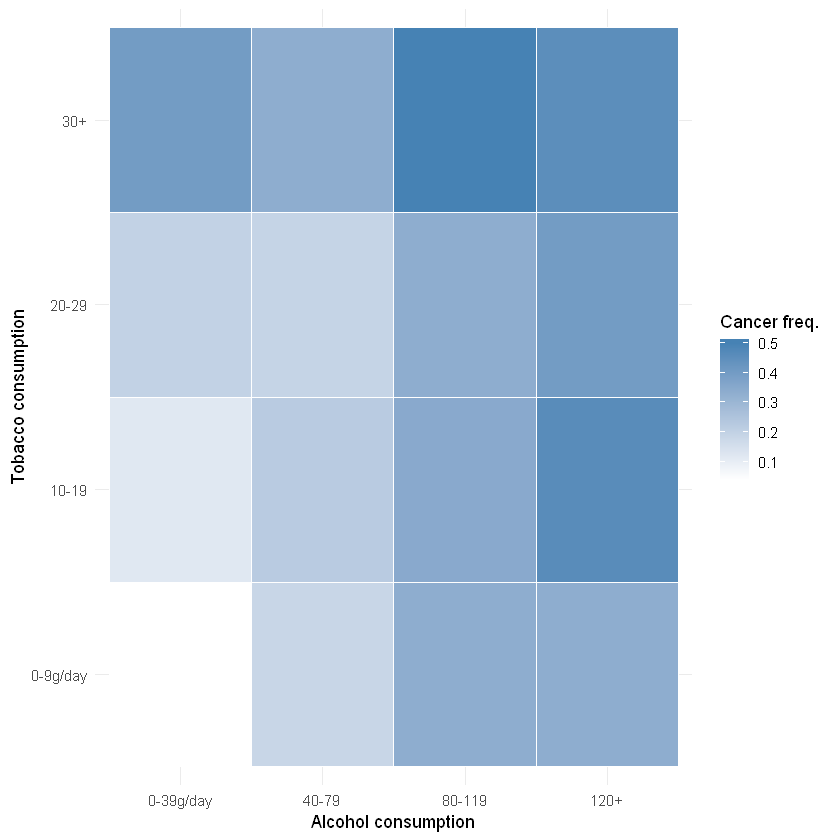

In [61]:
ggplot(esoph_sub, aes(x = alcgp,
y = tobgp,
fill = ncases / (ncases + ncontrols))) +
geom_tile(colour = "white") + # grid colour
scale_fill_gradient(low = "white",
high = "steelblue") +
theme_minimal() +
labs(fill = "Cancer freq.",
x = "Alcohol consumption",
y = "Tobacco consumption")